In [1]:
#link Google Drive to get the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Get the data From Drive
%cp -r drive/MyDrive/magNet.zip ./

In [3]:
#Extract the Data
!unzip magNet.zip 

Archive:  magNet.zip
   creating: data/
  inflating: data/dst_labels.csv     
  inflating: data/satellite_positions.csv  
  inflating: data/solar_wind.csv     
  inflating: data/sunspots.csv       


In [4]:
#Update sklearn Library
!pip install -U scikit-learn

     |████████████████████████████████| 22.2MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [5]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


%matplotlib inline

In [6]:
# read the data
DATA_PATH = Path("data/")
dst = pd.read_csv(DATA_PATH / "dst_labels.csv")
sunspots = pd.read_csv(DATA_PATH / "sunspots.csv")
solar_wind = pd.read_csv(DATA_PATH / "solar_wind.csv")
satellite_positions = pd.read_csv(DATA_PATH / "satellite_positions.csv")

In [7]:
solar_wind.head()

,period,timedelta,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature,source
0,train_a,0 days 00:00:00,-5.55,3.00,1.25,11.09,153.37,-5.55,3.00,1.25,11.09,153.37,6.80,1.53,383.92,110237.0,ac
1,train_a,0 days 00:01:00,-5.58,3.16,1.17,10.10,151.91,-5.58,3.16,1.17,10.10,151.91,6.83,1.69,381.79,123825.0,ac
2,train_a,0 days 00:02:00,-5.15,3.66,0.85,7.87,146.04,-5.15,3.66,0.85,7.87,146.04,6.77,1.97,389.11,82548.0,ac
3,train_a,0 days 00:03:00,-5.20,3.68,0.68,6.17,146.17,-5.20,3.68,0.68,6.17,146.17,6.74,1.97,389.11,82548.0,ac
4,train_a,0 days 00:04:00,-5.12,3.68,0.49,4.62,145.72,-5.12,3.68,0.49,4.62,145.72,6.65,1.77,384.26,94269.0,ac


In [8]:
#Data indexing according to the timestamps
dst.timedelta = pd.to_timedelta(dst.timedelta)
dst.set_index(["period", "timedelta"], inplace=True)

sunspots.timedelta = pd.to_timedelta(sunspots.timedelta)
sunspots.set_index(["period", "timedelta"], inplace=True)

solar_wind.timedelta = pd.to_timedelta(solar_wind.timedelta)
solar_wind.set_index(["period", "timedelta"], inplace=True)

satellite_positions.timedelta = pd.to_timedelta(satellite_positions.timedelta)
satellite_positions.set_index(["period", "timedelta"], inplace=True)

In [9]:
print("Dst shape: ", dst.shape)
dst.head()

Dst shape:  (139872, 1)


dst
period  timedelta           
train_a 0 days 00:00:00   -7
        0 days 01:00:00  -10
        0 days 02:00:00  -10
        0 days 03:00:00   -6
        0 days 04:00:00   -2

In [10]:
dst.groupby("period").describe()

dst                                                    
           count       mean        std    min   25%   50%  75%   max
period                                                              
train_a  28824.0 -16.576707  26.083191 -387.0 -26.0 -12.0 -1.0  65.0
train_b  52584.0  -9.695154  16.443049 -223.0 -17.0  -7.0  1.0  59.0
train_c  58464.0  -9.556325  16.506404 -374.0 -16.0  -7.0  0.0  67.0

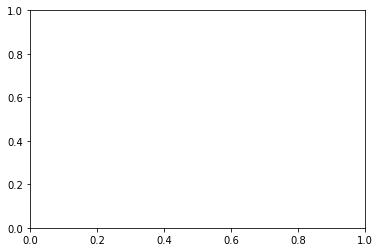

In [11]:
fig, ax = plt.subplots()
colors = ["r", "b", "y"]
for i, period in enumerate(dst.groupby("period")):
    period_name, df = period
    

In [12]:
print("Solar wind shape: ", solar_wind.shape)
solar_wind.head()

Solar wind shape:  (8392320, 15)


bx_gse  by_gse  bz_gse  ...   speed  temperature  source
period  timedelta                                ...                             
train_a 0 days 00:00:00   -5.55    3.00    1.25  ...  383.92     110237.0      ac
        0 days 00:01:00   -5.58    3.16    1.17  ...  381.79     123825.0      ac
        0 days 00:02:00   -5.15    3.66    0.85  ...  389.11      82548.0      ac
        0 days 00:03:00   -5.20    3.68    0.68  ...  389.11      82548.0      ac
        0 days 00:04:00   -5.12    3.68    0.49  ...  384.26      94269.0      ac

[5 rows x 15 columns]

In [13]:
print("Sunspot shape: ", sunspots.shape)
sunspots.head()

Sunspot shape:  (192, 1)


smoothed_ssn
period  timedelta              
train_a 0 days             65.4
        13 days            72.0
        44 days            76.9
        74 days            80.8
        105 days           85.4

In [14]:
solar_wind.groupby("period").describe().T

period                  train_a       train_b       train_c
bx_gse      count  1.575012e+06  3.084130e+06  3.407290e+06
            mean  -1.781301e+00 -3.088789e-01 -4.619076e-01
            std    4.339212e+00  3.627830e+00  3.245485e+00
            min   -5.463000e+01 -2.937000e+01 -4.546000e+01
            25%   -4.960000e+00 -3.070000e+00 -2.800000e+00
...                         ...           ...           ...
temperature min    1.000000e+04  1.496000e+03  0.000000e+00
            25%    4.364900e+04  3.741400e+04  4.007400e+04
            50%    7.923800e+04  8.552400e+04  7.152100e+04
            75%    1.325500e+05  1.873250e+05  1.310880e+05
            max    6.223700e+06  4.206672e+06  5.751308e+06

[112 rows x 3 columns]

In [15]:
sunspots.groupby("period").describe().T

period                 train_a     train_b    train_c
smoothed_ssn count   40.000000   72.000000  80.000000
             mean   136.902500   51.850000  24.313750
             std     34.563168   39.200266  19.020414
             min     65.400000    3.900000   2.200000
             25%    108.375000   15.325000   7.775000
             50%    151.500000   43.150000  20.500000
             75%    164.400000   91.225000  38.525000
             max    175.200000  116.400000  69.500000

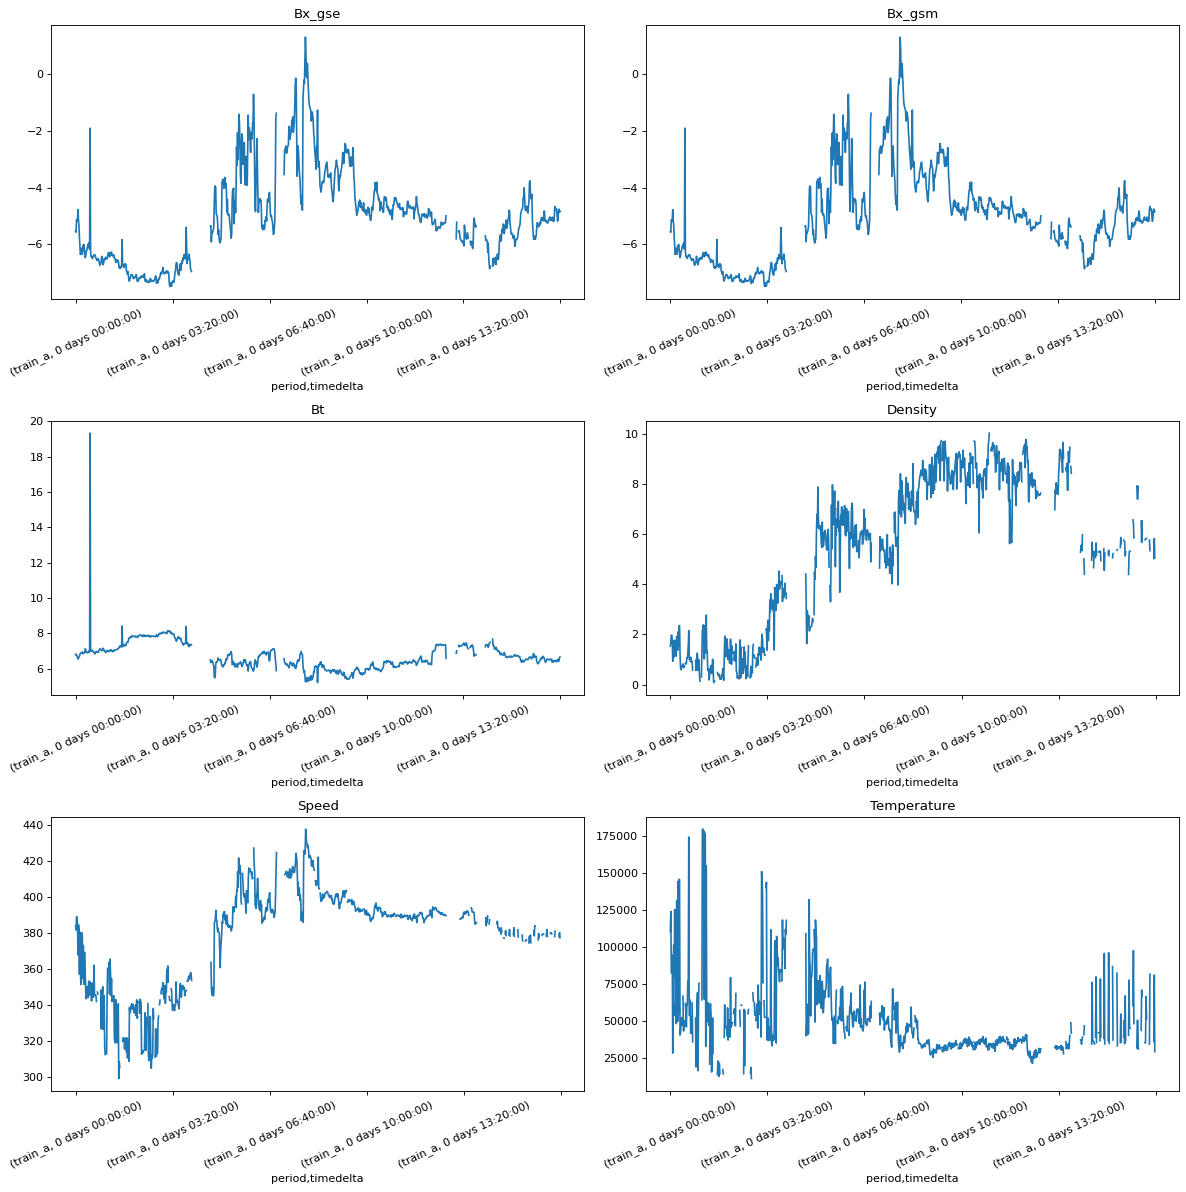

In [16]:
def show_raw_visualization(data):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), dpi=80)
    for i, key in enumerate(data.columns):
        t_data = data[key]
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            title=f"{key.capitalize()}",
            rot=25,
        )

    fig.subplots_adjust(hspace=0.8)
    plt.tight_layout()


cols_to_plot = ["bx_gse", "bx_gsm", "bt", "density", "speed", "temperature"]
show_raw_visualization(solar_wind[cols_to_plot].iloc[:1000])

In [17]:
solar_wind.reset_index()

,period,timedelta,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature,source
0,train_a,0 days 00:00:00,-5.55,3.00,1.25,11.09,153.37,-5.55,3.00,1.25,11.09,153.37,6.80,1.53,383.92,110237.0,ac
1,train_a,0 days 00:01:00,-5.58,3.16,1.17,10.10,151.91,-5.58,3.16,1.17,10.10,151.91,6.83,1.69,381.79,123825.0,ac
2,train_a,0 days 00:02:00,-5.15,3.66,0.85,7.87,146.04,-5.15,3.66,0.85,7.87,146.04,6.77,1.97,389.11,82548.0,ac
3,train_a,0 days 00:03:00,-5.20,3.68,0.68,6.17,146.17,-5.20,3.68,0.68,6.17,146.17,6.74,1.97,389.11,82548.0,ac
4,train_a,0 days 00:04:00,-5.12,3.68,0.49,4.62,145.72,-5.12,3.68,0.49,4.62,145.72,6.65,1.77,384.26,94269.0,ac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392315,train_c,2435 days 23:55:00,-1.18,2.00,-3.92,-59.28,120.51,-1.17,2.98,-3.23,-45.24,111.48,4.56,4.64,348.73,23368.0,ac
8392316,train_c,2435 days 23:56:00,-1.34,2.12,-3.83,-56.78,122.23,-1.33,3.08,-3.12,-42.95,113.45,4.58,4.27,346.36,26497.0,ac
8392317,train_c,2435 days 23:57:00,-1.62,2.33,-3.63,-51.98,124.76,-1.61,3.22,-2.87,-38.57,116.58,4.61,3.95,344.12,27050.0,ac
8392318,train_c,2435 days 23:58:00,-2.27,2.48,-3.22,-43.81,132.50,-2.26,3.25,-2.44,-31.61,124.81,4.65,2.81,338.52,33257.0,ac


In [18]:
solar_wind.isna().sum()

bx_gse         325888
by_gse         325888
bz_gse         325888
theta_gse      325888
phi_gse        326388
bx_gsm         325888
by_gsm         325888
bz_gsm         325888
theta_gsm      325888
phi_gsm        326388
bt             325888
density        684890
speed          689555
temperature    811768
source         316816
dtype: int64

In [19]:
sunspots

smoothed_ssn
period  timedelta              
train_a 0 days             65.4
        13 days            72.0
        44 days            76.9
        74 days            80.8
        105 days           85.4
...                         ...
train_c 2283 days          26.4
        2314 days          29.5
        2344 days          34.5
        2375 days          39.1
        2405 days          42.5

[192 rows x 1 columns]

In [20]:
solar_wind.join(sunspots).join(dst)

bx_gse  by_gse  bz_gse  ...  source  smoothed_ssn  dst
period  timedelta                                   ...                           
train_a 0 days 00:00:00      -5.55    3.00    1.25  ...      ac          65.4 -7.0
        0 days 00:01:00      -5.58    3.16    1.17  ...      ac           NaN  NaN
        0 days 00:02:00      -5.15    3.66    0.85  ...      ac           NaN  NaN
        0 days 00:03:00      -5.20    3.68    0.68  ...      ac           NaN  NaN
        0 days 00:04:00      -5.12    3.68    0.49  ...      ac           NaN  NaN
...                            ...     ...     ...  ...     ...           ...  ...
train_c 2435 days 23:55:00   -1.18    2.00   -3.92  ...      ac           NaN  NaN
        2435 days 23:56:00   -1.34    2.12   -3.83  ...      ac           NaN  NaN
        2435 days 23:57:00   -1.62    2.33   -3.63  ...      ac           NaN  NaN
        2435 days 23:58:00   -2.27    2.48   -3.22  ...      ac           NaN  NaN
        2435 days 23:59:00   -2.15    2.41   -3.30  ...      ac           NaN  NaN

[8392320 rows x 17 columns]

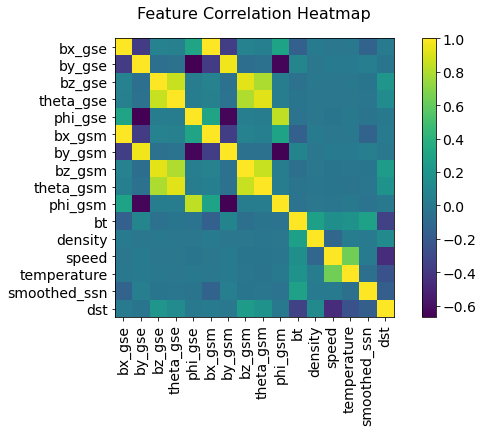

In [21]:
corr = solar_wind.join(sunspots).join(dst).fillna(method="pad").corr()
corr = solar_wind.join(sunspots).join(dst).fillna(method="bfill").corr()
plt.figure(figsize=(10, 5))
plt.matshow(corr, fignum=1)
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=14, rotation=90)
plt.gca().xaxis.tick_bottom()
plt.yticks(range(corr.shape[1]), corr.columns, fontsize=14)


cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

In [22]:
from numpy.random import seed
from tensorflow.random import set_seed
from tensorflow.random import set_seed
seed(2020)
set_seed(2021)

In [23]:
import numpy as np
from sklearn.preprocessing import StandardScaler,power_transform
from sklearn.impute import  SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import PowerTransformer
# subset of solar wind features to use for modeling
SOLAR_WIND_FEATURES = [
    "bt",
    "temperature",
    "bx_gse",
    "by_gse",
    "bz_gse",
    "phi_gse",
    "theta_gse",
    "bx_gsm",
    "by_gsm",
    "bz_gsm",
    "phi_gsm",
    "theta_gsm",
    "speed",
    "density",
]

# all of the features we'll use, including sunspot numbers
XCOLS = (
    [col + "_mean" for col in SOLAR_WIND_FEATURES]
    + [col + "_std" for col in SOLAR_WIND_FEATURES]
    
    + ["smoothed_ssn"] 
)


def impute_features(feature_df, imp = None):
    """Imputes data using the following methods:
    - `smoothed_ssn`: forward fill
    - `solar_wind`: interpolation
    """
    # forward fill sunspot data for the rest of the month
    feature_df.smoothed_ssn = feature_df.smoothed_ssn.fillna(method="ffill")
    # missing solar wind values imputation using most-frequent strategy
    feature_df=feature_df.reset_index()
    cols = feature_df.columns[2:]
    if imp == None:
      imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      imp.fit(feature_df[cols])
    temp = imp.transform(feature_df[cols])
    feature_df[cols] = temp
    feature_df.timedelta = pd.to_timedelta(feature_df.timedelta)
    feature_df.set_index(["period", "timedelta"], inplace=True)
    return feature_df , imp


def aggregate_hourly(feature_df, aggs=["mean", "std"]):
    """Aggregates features to the floor of each hour using mean and standard deviation.
    e.g. All values from "11:00:00" to "11:59:00" will be aggregated to "11:00:00".
    """
    # group by the floor of each hour use timedelta index
    agged = feature_df.groupby(
        ["period", feature_df.index.get_level_values(1).floor("H")]
    ).agg(aggs)
    # flatten hierachical column index
    agged.columns = ["_".join(x) for x in agged.columns]
    return agged


def preprocess_features(solar_wind, sunspots, scaler=None ,subset=None):
    """
    Preprocessing steps:
        - Subset the data
        - Aggregate hourly
        - Join solar wind and sunspot data
        - Scale using standard scaler
        - Impute missing values
    """
    # select features we want to use
    if subset:
        solar_wind = solar_wind[subset]
    # aggregate solar wind data and join with sunspots
    
    hourly_features = aggregate_hourly(solar_wind).join(sunspots)

    # subtract mean and divide by standard deviation
    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(hourly_features)

    normalized = pd.DataFrame(
        scaler.transform(hourly_features),
        index=hourly_features.index,
        columns=hourly_features.columns,
    )

    # impute missing values
    imputed, imp = impute_features(normalized)

    # we want to return the scaler object as well to use later during prediction
    return imputed, scaler, imp

In [24]:

features, scaler, imputer = preprocess_features(solar_wind, sunspots , subset=SOLAR_WIND_FEATURES)
print(features.shape)
features.head()

(139872, 29)


bt_mean    bt_std  ...  density_std  smoothed_ssn
period  timedelta                            ...                           
train_a 0 days 00:00:00  0.499705  2.443614  ...    -0.205724      0.139444
        0 days 01:00:00  0.547177 -0.224580  ...    -0.058215      0.139444
        0 days 02:00:00  0.739905 -0.770240  ...    -0.220012      0.139444
        0 days 03:00:00  0.699098 -0.278783  ...     0.218373      0.139444
        0 days 04:00:00  0.223933 -0.225168  ...     0.097253      0.139444

[5 rows x 29 columns]

In [25]:
print(features.shape)
features.head()

(139872, 29)


bt_mean    bt_std  ...  density_std  smoothed_ssn
period  timedelta                            ...                           
train_a 0 days 00:00:00  0.499705  2.443614  ...    -0.205724      0.139444
        0 days 01:00:00  0.547177 -0.224580  ...    -0.058215      0.139444
        0 days 02:00:00  0.739905 -0.770240  ...    -0.220012      0.139444
        0 days 03:00:00  0.699098 -0.278783  ...     0.218373      0.139444
        0 days 04:00:00  0.223933 -0.225168  ...     0.097253      0.139444

[5 rows x 29 columns]

In [26]:
# check to make sure missing values are filled
assert (features.isna().sum() == 0).all()

In [27]:
# Note from DrivenData Reviewer: As written, the labels created here
# are behind by one hour, i.e. the column labeled `t0` is actually `t-1`
# and the column labeled `t1` is actually `t0`
# To correct, the below function can be replaced with:
# def process_labels(dst):
#     y = dst.copy()
#     y["t0"] = y.groupby("period").dst.shift(-1)
#     y["t1"] = y.groupby("period").dst.shift(-2)
#     return y[YCOLS]
YCOLS = ["t0", "t1"]
def process_labels(dst):
    y = dst.copy()
    y["t1"] = y.groupby("period").dst.shift(-1)
    y.columns = YCOLS
    return y


labels = process_labels(dst)
labels.head()

t0    t1
period  timedelta                
train_a 0 days 00:00:00  -7 -10.0
        0 days 01:00:00 -10 -10.0
        0 days 02:00:00 -10  -6.0
        0 days 03:00:00  -6  -2.0
        0 days 04:00:00  -2   3.0

In [28]:
data = labels.join(features)
data.head()

t0    t1  ...  density_std  smoothed_ssn
period  timedelta                  ...                           
train_a 0 days 00:00:00  -7 -10.0  ...    -0.205724      0.139444
        0 days 01:00:00 -10 -10.0  ...    -0.058215      0.139444
        0 days 02:00:00 -10  -6.0  ...    -0.220012      0.139444
        0 days 03:00:00  -6  -2.0  ...     0.218373      0.139444
        0 days 04:00:00  -2   3.0  ...     0.097253      0.139444

[5 rows x 31 columns]

In [29]:
labels

t0    t1
period  timedelta                   
train_a 0 days 00:00:00     -7 -10.0
        0 days 01:00:00    -10 -10.0
        0 days 02:00:00    -10  -6.0
        0 days 03:00:00     -6  -2.0
        0 days 04:00:00     -2   3.0
...                         ..   ...
train_c 2435 days 19:00:00 -16 -14.0
        2435 days 20:00:00 -14 -14.0
        2435 days 21:00:00 -14 -15.0
        2435 days 22:00:00 -15 -14.0
        2435 days 23:00:00 -14   NaN

[139872 rows x 2 columns]

In [30]:
# Note from DrivenData Reviewer: Here, the validation set is taken from
# the head of the same data as the test set, and therefore is a complete
# subset of the test set. To create a validation set that has no intersection
# with the test set, the `val` assignment line should be replaced with:
# `val = interim.groupby("period").head(val_per_period)`
def get_train_test_val(data, test_per_period, val_per_period):
    """Splits data across periods into train, test, and validation"""
    # assign the first `test_per_period` rows from each period to test
    test = data.groupby("period").head(test_per_period)
    interim = data[~data.index.isin(test.index)]
    # assign the first `val_per_period` rows from each period to validation
    val = data.groupby("period").head(val_per_period)
    # the remaining rows are assigned to train
    train = interim[~interim.index.isin(val.index)]
    return train, test, val


train, test, val = get_train_test_val(data, test_per_period=6_000, val_per_period=10_000)

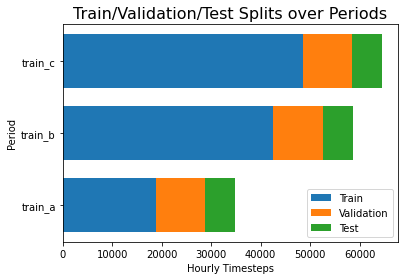

In [31]:
ind = [0, 1, 2]
names = ["train_a", "train_b", "train_c"]
width = 0.75
train_cnts = [len(df) for _, df in train.groupby("period")]
val_cnts = [len(df) for _, df in val.groupby("period")]
test_cnts = [len(df) for _, df in test.groupby("period")]

p1 = plt.barh(ind, train_cnts, width)
p2 = plt.barh(ind, val_cnts, width, left=train_cnts)
p3 = plt.barh(ind, test_cnts, width, left=np.add(val_cnts, train_cnts).tolist())

plt.yticks(ind, names)
plt.ylabel("Period")
plt.xlabel("Hourly Timesteps")
plt.title("Train/Validation/Test Splits over Periods", fontsize=16)
plt.legend(["Train", "Validation", "Test"])

In [32]:
print(train.shape)
train.head()

(109872, 31)


t0    t1  ...  density_std  smoothed_ssn
period  timedelta                    ...                           
train_a 416 days 16:00:00 -15 -12.0  ...     0.916469      1.277265
        416 days 17:00:00 -12 -13.0  ...     0.348513      1.277265
        416 days 18:00:00 -13  -7.0  ...     0.379813      1.277265
        416 days 19:00:00  -7  -4.0  ...     0.026178      1.277265
        416 days 20:00:00  -4  -8.0  ...     0.359572      1.277265

[5 rows x 31 columns]

In [33]:
print(test.shape)
test.head()

(18000, 31)


t0    t1  ...  density_std  smoothed_ssn
period  timedelta                  ...                           
train_a 0 days 00:00:00  -7 -10.0  ...    -0.205724      0.139444
        0 days 01:00:00 -10 -10.0  ...    -0.058215      0.139444
        0 days 02:00:00 -10  -6.0  ...    -0.220012      0.139444
        0 days 03:00:00  -6  -2.0  ...     0.218373      0.139444
        0 days 04:00:00  -2   3.0  ...     0.097253      0.139444

[5 rows x 31 columns]

In [34]:
print(val.shape)
val.head()

(30000, 31)


t0    t1  ...  density_std  smoothed_ssn
period  timedelta                  ...                           
train_a 0 days 00:00:00  -7 -10.0  ...    -0.205724      0.139444
        0 days 01:00:00 -10 -10.0  ...    -0.058215      0.139444
        0 days 02:00:00 -10  -6.0  ...    -0.220012      0.139444
        0 days 03:00:00  -6  -2.0  ...     0.218373      0.139444
        0 days 04:00:00  -2   3.0  ...     0.097253      0.139444

[5 rows x 31 columns]

In [35]:
from keras import preprocessing


data_config = {
    "timesteps": 128,
    "batch_size": 128,
}


def timeseries_dataset_from_df(df, batch_size):
    dataset = None
    timesteps = data_config["timesteps"]

    # iterate through periods
    for _, period_df in df.groupby("period"):
        # realign features and labels so that first sequence of 32 is aligned with the 33rd target
        inputs = period_df[XCOLS][:-timesteps]
        outputs = period_df[YCOLS][timesteps:]

        period_ds = preprocessing.timeseries_dataset_from_array(
            inputs,
            outputs,
            timesteps,
            batch_size=batch_size,
        )

        if dataset is None:
            dataset = period_ds
        else:
            dataset = dataset.concatenate(period_ds)

    return dataset

train_ds = timeseries_dataset_from_df(train, data_config["batch_size"])
val_ds = timeseries_dataset_from_df(val, data_config["batch_size"])

print(f"Number of train batches: {len(train_ds)}")
print(f"Number of val batches: {len(val_ds)}")

Number of train batches: 854
Number of val batches: 231


In [36]:
import tensorflow as tf

In [37]:
from tensorflow.keras.layers import Dense, LSTM,GRU, Bidirectional, Dropout, Embedding, Input, Flatten
from tensorflow.keras.models import Sequential
import keras

In [38]:
from tensorflow.keras.layers import Dense, LSTM,GRU, Bidirectional, Dropout, GlobalAveragePooling1D,Input,Concatenate,Flatten,Embedding,Reshape,Conv1D,TimeDistributed,BatchNormalization,GaussianNoise
from tensorflow.keras.models import Sequential

# define dummy model
model_config = {"n_epochs": 100, "n_neurons": 244*2 , "dropout": 0.0, "stateful": False}

input1 = Input(shape=( data_config["timesteps"], len(XCOLS)), name='x1')
lstm1= Bidirectional(LSTM(
        model_config["n_neurons"],
        stateful=model_config["stateful"],
        dropout=model_config["dropout"],return_sequences=True
    ))(input1)
gru1= Bidirectional(GRU(
         model_config["n_neurons"] *3,     
        stateful=model_config["stateful"],
        dropout=0.0,return_sequences=True
    ))(lstm1)

gaverage = Flatten() (gru1)
dense1 = Dense(96)(gaverage)
dense1 = Dense(128)(dense1)
dense1 = Dense(64)(dense1)
dense = Dense(2)(dense1)


model = keras.models.Model(inputs=input1, outputs=dense)
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(0.0001),
)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x1 (InputLayer)              [(None, 128, 29)]         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128, 976)          2022272   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128, 2928)         21450528  
_________________________________________________________________
flatten (Flatten)            (None, 374784)            0         
_________________________________________________________________
dense (Dense)                (None, 96)                35979360  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               12416     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256  

In [39]:
from tensorflow.keras.layers import Dense, LSTM,GRU, Bidirectional, Dropout, GlobalAveragePooling1D,Input,Concatenate,Flatten,Embedding,Reshape,Conv1D,TimeDistributed,BatchNormalization,GaussianNoise
from tensorflow.keras.models import Sequential

# define our model
model_config = {"n_epochs": 30, "n_neurons": 192*2 , "dropout": 0.0, "stateful": False}

input1 = Input(shape=( data_config["timesteps"], len(XCOLS)), name='x1')
lstm1= Bidirectional(LSTM(
        model_config["n_neurons"],
        stateful=model_config["stateful"],
        dropout=model_config["dropout"],return_sequences=True
    ))(input1)
gru1= Bidirectional(GRU(
         model_config["n_neurons"] *3,   
        stateful=model_config["stateful"],
        dropout=0.0,return_sequences=True
    ))(lstm1)

gaverage = Flatten() (gru1)
dense1 = Dense(96)(gaverage)
dense1 = Dense(128)(dense1)
dense1 = Dense(64)(dense1)
dense = Dense(2)(dense1)


model = keras.models.Model(inputs=input1, outputs=dense)
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(0.0001),
)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x1 (InputLayer)              [(None, 128, 29)]         0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128, 768)          1271808   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128, 2304)         13284864  
_________________________________________________________________
flatten_1 (Flatten)          (None, 294912)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 96)                28311648  
_________________________________________________________________
dense_5 (Dense)              (None, 128)               12416     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256

In [40]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'model2', save_best_only=True, monitor='val_loss', mode='min')
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",factor=0.3, patience=4, min_lr=1e-10, mode='min')
history = model.fit(
    train_ds,
    batch_size=data_config["batch_size"],
    epochs=model_config["n_epochs"],
    verbose=2,
    callbacks=[checkpoint, lr_reducer],
    shuffle=False,
    validation_data=val_ds,
)

Epoch 1/30
854/854 - 256s - loss: 172.7304 - val_loss: 224.2974


INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 2/30
854/854 - 248s - loss: 121.6470 - val_loss: 183.6300


INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 3/30
854/854 - 248s - loss: 100.9468 - val_loss: 175.6125


INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 4/30
854/854 - 248s - loss: 93.9416 - val_loss: 180.5954
Epoch 5/30
854/854 - 248s - loss: 81.5066 - val_loss: 187.9778
Epoch 6/30
854/854 - 248s - loss: 76.8617 - val_loss: 183.7154
Epoch 7/30
854/854 - 248s - loss: 72.5896 - val_loss: 186.1124
Epoch 8/30
854/854 - 249s - loss: 75.2448 - val_loss: 160.5740


INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 9/30
854/854 - 248s - loss: 68.0619 - val_loss: 160.8962
Epoch 10/30
854/854 - 248s - loss: 63.3528 - val_loss: 163.5426
Epoch 11/30
854/854 - 248s - loss: 60.2530 - val_loss: 165.4409
Epoch 12/30
854/854 - 249s - loss: 57.5033 - val_loss: 167.4291
Epoch 13/30
854/854 - 248s - loss: 57.2165 - val_loss: 151.7759


INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 14/30
854/854 - 248s - loss: 54.7289 - val_loss: 150.1935


INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 15/30
854/854 - 248s - loss: 53.0814 - val_loss: 149.9113


INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 16/30
854/854 - 249s - loss: 51.7854 - val_loss: 150.0957
Epoch 17/30
854/854 - 248s - loss: 50.6681 - val_loss: 150.5130
Epoch 18/30
854/854 - 248s - loss: 49.5939 - val_loss: 151.0257
Epoch 19/30
854/854 - 248s - loss: 48.5037 - val_loss: 151.4574
Epoch 20/30
854/854 - 249s - loss: 47.5913 - val_loss: 147.2370


INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 21/30
854/854 - 248s - loss: 46.8765 - val_loss: 147.1350


INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 22/30
854/854 - 248s - loss: 46.2734 - val_loss: 147.2284
Epoch 23/30
854/854 - 248s - loss: 45.7156 - val_loss: 147.3565
Epoch 24/30
854/854 - 249s - loss: 45.1978 - val_loss: 147.4995
Epoch 25/30
854/854 - 248s - loss: 44.7160 - val_loss: 147.6507
Epoch 26/30
854/854 - 248s - loss: 44.2548 - val_loss: 146.8669


INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 27/30
854/854 - 248s - loss: 43.8429 - val_loss: 147.0007
Epoch 28/30
854/854 - 248s - loss: 43.5678 - val_loss: 147.1234
Epoch 29/30
854/854 - 248s - loss: 43.3380 - val_loss: 147.2192
Epoch 30/30
854/854 - 248s - loss: 43.1340 - val_loss: 147.2960


In [41]:
model = keras.models.load_model("model2")

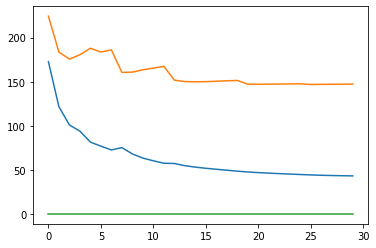

In [42]:
for name, values in history.history.items():
    plt.plot(values)

In [43]:
test_ds = timeseries_dataset_from_df(test, data_config["batch_size"])

In [44]:
mse = model.evaluate(test_ds)
print(f"Test RMSE: {mse**.5:.2f}")

135/135 [==============================] - 17s 112ms/step - loss: 149.2541
Test RMSE: 12.22


In [45]:
import json
import pickle

model.save("model")

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
with open("imputer.pkl", "wb") as f:
    pickle.dump(imputer, f)
data_config["solar_wind_subset"] = SOLAR_WIND_FEATURES
print(data_config)
with open("config.json", "w") as f:
    json.dump(data_config, f)

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


{'timesteps': 128, 'batch_size': 128, 'solar_wind_subset': ['bt', 'temperature', 'bx_gse', 'by_gse', 'bz_gse', 'phi_gse', 'theta_gse', 'bx_gsm', 'by_gsm', 'bz_gsm', 'phi_gsm', 'theta_gsm', 'speed', 'density']}


In [46]:
!zip -r model.zip model

  adding: model/ (stored 0%)
  adding: model/assets/ (stored 0%)
  adding: model/variables/ (stored 0%)
  adding: model/variables/variables.index (deflated 58%)
  adding: model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: model/saved_model.pb (deflated 89%)


In [ ]:
#download model.zip/scaler/imputer/config and put in one folder
#extract model.zip
# predict.py from running the next cell then download it.
# add all these files to archive as submission.zip and send to competition or to run on Noaa Runtime
#yraaaaaaa ou scored the best submission LB: 11.1311

In [47]:
%%writefile predict.py
#this is the predict.py file
from sklearn.preprocessing import StandardScaler
import keras

import numpy as np
from typing import Tuple


import json
import pickle
import pandas as pd



model = keras.models.load_model("model")

with open("config.json", "r") as f:
    CONFIG = json.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("imputer.pkl", "rb") as f:
    imputer = pickle.load(f)


TIMESTEPS = CONFIG["timesteps"]
SOLAR_WIND_FEATURES = ["bt","temperature","bx_gse","by_gse","bz_gse","phi_gse","theta_gse","bx_gsm","by_gsm","bz_gsm","phi_gsm","theta_gsm","speed","density",]

XCOLS = (
    [col + "_mean" for col in SOLAR_WIND_FEATURES]
    + [col + "_std" for col in SOLAR_WIND_FEATURES]
    + ["smoothed_ssn"]
)


# Define functions for preprocessing
def impute_features(feature_df, imp = None):
    """Imputes data using the following methods:
    - `smoothed_ssn`: forward fill
    - `solar_wind`: interpolation
    """
    # forward fill sunspot data for the rest of the month
    feature_df.smoothed_ssn = feature_df.smoothed_ssn.fillna(method="ffill")
    feature_df=feature_df.reset_index()
    if imp == None:
      imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      imp.fit(feature_df)
    cols = feature_df.columns[1:]
    temp = imp.transform(feature_df[cols])
    feature_df[cols] = temp
    feature_df.timedelta = pd.to_timedelta(feature_df.timedelta)
    feature_df.set_index(["timedelta"], inplace=True)
    return feature_df , imp

def aggregate_hourly(feature_df, aggs=["mean", "std"]):
    """Aggregates features to the floor of each hour using mean and standard deviation.
    e.g. All values from "11:00:00" to "11:59:00" will be aggregated to "11:00:00".
    """
    # group by the floor of each hour use timedelta index
    agged = feature_df.groupby(
        [feature_df.index.get_level_values(0).floor("H")]
    ).agg(aggs)
    # flatten hierachical column index
    agged.columns = ["_".join(x) for x in agged.columns]
    return agged

def preprocess_features(solar_wind, sunspots, scaler=None,imputer=None, subset=None):
    """
    Preprocessing steps:
        - Subset the data
        - Aggregate hourly
        - Join solar wind and sunspot data
        - Scale using standard scaler
        - Impute missing values
    """
    # select features we want to use
    if subset:
        solar_wind = solar_wind[subset]

    # aggregate solar wind data and join with sunspots
    hourly_features = aggregate_hourly(solar_wind).join(sunspots)

    # subtract mean and divide by standard deviation
    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(hourly_features)

    normalized = pd.DataFrame(
        scaler.transform(hourly_features),
        index=hourly_features.index,
        columns=hourly_features.columns,
    )

    # impute missing values
    imputed, imp = impute_features(normalized,imputer)

    # we want to return the scaler object as well to use later during prediction
    return imputed, scaler,imp

# THIS MUST BE DEFINED FOR YOUR SUBMISSION TO RUN
def predict_dst(
    solar_wind_7d: pd.DataFrame,
    satellite_positions_7d: pd.DataFrame,
    latest_sunspot_number: float,
) -> Tuple[float, float]:
    """
    Take all of the data up until time t-1, and then make predictions for
    times t and t+1.
    Parameters
    ----------
    solar_wind_7d: pd.DataFrame
        The last 7 days of satellite data up until (t - 1) minutes [exclusive of t]
    satellite_positions_7d: pd.DataFrame
        The last 7 days of satellite position data up until the present time [inclusive of t]
    latest_sunspot_number: float
        The latest monthly sunspot number (SSN) to be available
    Returns
    -------
    predictions : Tuple[float, float]
        A tuple of two predictions, for (t and t + 1 hour) respectively; these should
        be between -2,000 and 500.
    """
    # Re-format data to fit into our pipeline
    sunspots = pd.DataFrame(index=solar_wind_7d.index, columns=["smoothed_ssn"])
    sunspots["smoothed_ssn"] = latest_sunspot_number
    
    # Process our features and grab last 128 (timesteps) hours
    features, s, i = preprocess_features(
        solar_wind_7d, sunspots, scaler=scaler,imputer = imputer, subset=SOLAR_WIND_FEATURES
    )
    model_input = features[-TIMESTEPS:][XCOLS].values.reshape(
        (1, TIMESTEPS, features.shape[1])
    )

    
    # Make a prediction
    prediction_at_t0, prediction_at_t1 = model.predict(model_input)[0]


    # Optional check for unexpected values
    if not np.isfinite(prediction_at_t0):
        prediction_at_t0 = -11
    if not np.isfinite(prediction_at_t1):
        prediction_at_t1 = -11

    if prediction_at_t0 > 500:
         prediction_at_t0 = 500

    if prediction_at_t0 < -2000:
         prediction_at_t0 = -2000

    if prediction_at_t1 > 500:
         prediction_at_t1 = 500

    if prediction_at_t1 < -2000:
         prediction_at_t1 = -2000
    return prediction_at_t0, prediction_at_t1

Writing predict.py
